
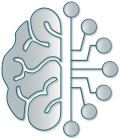

**Start at:** Wednesday 07 February 2024, 22:57:15  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color, fg, bg, hl
vID.init(cwd0)

import tools4pyPhysChem as t4pPC

# Statistical treatment of data<br>(data science for beginners)<br><br>eXplainable AI (XAI)

<img width="25%" src="./DS4B-iris-images/ThinkerRodin-DallE.png" style="display:block; margin-left:auto; margin-right:auto" id="ThinkerByRodin"/>  

## Explainability with SHAP

<div class="intro">

SHAP stands for **SH**apley **A**dditive ex**P**lanations. Shapley values are a way to explain the output of any machine learning model. It uses a game theoretic approach that measures each *player*'s contribution to the final outcome. One of the fundamental properties of Shapley values is that they always sum up to the difference between the game outcome when all players are present and the game outcome when no players are present.

In machine learning, each **feature** is assigned an **importance value** representing its **contribution to the model's output**.

SHAP values show how each feature affects each final prediction, the significance of each feature compared to others, and the model's reliance on the interaction between features

</div>

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

import shap

/tmp/ipykernel_27201/1608019923.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-07 22:57:16.790139: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-07 22:57:16.792353: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 22:57:16.829066: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.

### Load the model, the scaler and the iris training and test datasets

<div class="intro">

First load the ANN model trained previously with the [iris3](./DS4B-Iris3.ipynb) notebook, as well as the scaler and the unstandardized datas used to train and test this ANN model.
</div>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hLayer1 (Dense)             (None, 7)                 21        
                                                                 
 hLayer2 (Dense)             (None, 5)                 40        
                                                                 
 oLayer (Dense)              (None, 3)                 18        
                                                                 
Total params: 79 (316.00 Byte)
Trainable params: 79 (316.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-02-07 22:57:19.289314: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


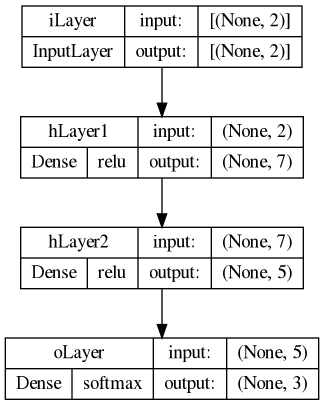

In [3]:
# load the model and the scaler
IrisANNmodel = tf.keras.models.load_model('./DS4B-Iris-SavedModels/ANNmodel-Iris-savedForIris4.keras')
import pickle
scaler = pickle.load(open("./DS4B-Iris-SavedModels/scaler_Iris-savedForIris4.pkl", 'rb'))

# Show the model architecture
IrisANNmodel.summary()

# plot the model
from tensorflow.keras.utils import plot_model
plot_model(IrisANNmodel, show_shapes=True, show_layer_names=True, show_layer_activations=True)


In [4]:
data_train = pd.read_pickle('./DS4B-Iris-SavedModels/Iris-data_train-savedForIris4.pkl')
data_test = pd.read_pickle('./DS4B-Iris-SavedModels/Iris-data_test-savedForIris4.pkl')
display(data_train)
display(data_test)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
37,4.9,3.1,1.5,0.1,setosa,1.0,0.0,0.0
136,6.3,3.4,5.6,2.4,virginica,0.0,0.0,1.0
58,6.6,2.9,4.6,1.3,versicolor,0.0,1.0,0.0
119,6.0,2.2,5.0,1.5,virginica,0.0,0.0,1.0
39,5.1,3.4,1.5,0.2,setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
55,5.7,2.8,4.5,1.3,versicolor,0.0,1.0,0.0
36,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
98,5.1,2.5,3.0,1.1,versicolor,0.0,1.0,0.0
48,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
6,4.6,3.4,1.4,0.3,setosa,1.0,0.0,0.0
8,4.4,2.9,1.4,0.2,setosa,1.0,0.0,0.0
15,5.7,4.4,1.5,0.4,setosa,1.0,0.0,0.0
26,5.0,3.4,1.6,0.4,setosa,1.0,0.0,0.0
27,5.2,3.5,1.5,0.2,setosa,1.0,0.0,0.0
34,4.9,3.1,1.5,0.1,setosa,1.0,0.0,0.0
38,4.4,3.0,1.3,0.2,setosa,1.0,0.0,0.0
52,6.9,3.1,4.9,1.5,versicolor,0.0,1.0,0.0
54,6.5,2.8,4.6,1.5,versicolor,0.0,1.0,0.0
59,5.2,2.7,3.9,1.4,versicolor,0.0,1.0,0.0


<div class="rqE">

Training and test datas are standardized
</div>

In [5]:
class_names = ['setosa','versicolor','virginica']
features = ['petal_length','petal_width']

x_trainS = scaler.transform(data_train[features].values)
x_train = pd.DataFrame(x_trainS, columns=data_train[features].columns, index=data_train.index)
y_train = data_train[class_names]
x_train_unscaled = data_train[features]

x_testS = scaler.transform(data_test[features].values)
x_test = pd.DataFrame(x_testS, columns=data_test[features].columns, index=data_test.index)
y_test = data_test[class_names]
x_test_unscaled = data_test[features]

display(x_train)
display(y_train)

,petal_length,petal_width
37,-1.210137,-1.371847
136,1.090432,1.621274
58,0.529318,0.189781
119,0.753764,0.450053
39,-1.210137,-1.241711
...,...,...
55,0.473206,0.189781
36,-1.322360,-1.241711
98,-0.368465,-0.070490
48,-1.210137,-1.241711


,setosa,versicolor,virginica
37,1.0,0.0,0.0
136,0.0,0.0,1.0
58,0.0,1.0,0.0
119,0.0,0.0,1.0
39,1.0,0.0,0.0
...,...,...,...
55,0.0,1.0,0.0
36,1.0,0.0,0.0
98,0.0,1.0,0.0
48,1.0,0.0,0.0


### Brief reminder of the performance of the model and of the data

<div class="intro">

Just to get a basic impression of the model on one hand and of the data on the other hand, it is recommended viewing the confusion matrix, as well as the previous global analysis of the clustering of the data
    
<p style="text-align: center"><img width="1000px" src="./DS4B-svg/Iris3-ConfusionMatrix-petals.png" style="margin-left:auto; margin-right:auto" id="img_cm"/></img></p>

<p style="text-align: center"><img width="900px" src="DS4B-svg/jointplot_petals-sepals_classification.png" style="margin-left:auto; margin-right:auto" id="img_jpc"/></img></p>

</div>
<br>
<div class="rqE">

From the fraph on the right, setosa has the smallest petals, whilst virginica has the largest ones.
</div>

### Apply the `DeepExplainer` algorithm

<div class="intro">

It is an explainability technique that can be used for models with a neural network based architecture. This is the fastest neural network explainability approach and is based on running a SHAP-based version of the original Deep Learning Important FeaTures (DeepLIFT) algorithm.

`DeepExplainer` is the primary option, but it is possinle to check the other core explainers as well. For example, the `KernelExplainer` can be used on any model and thus, could also be an option on Deep Learning models

</div>

In [6]:
# select a set of background examples to take an expectation over
background = x_train.values
deep_explainer = shap.DeepExplainer(IrisANNmodel, background)

shap_values_train = deep_explainer.shap_values(x_train.values)

print(deep_explainer.expected_value)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


tf.Tensor([0.34051558 0.32605278 0.33343145], shape=(3,), dtype=float32)


### SHAP summary plots

<div class="intro">

In the next plot, the impact of a feature on the three iris classes is stacked to create the feature importance plot. If some features can differentiate a particular class from the rest, that is the plot where you can see it. In other words, the summary plot for multiclass classification can show you what the machine managed to learn from the features.

</div>

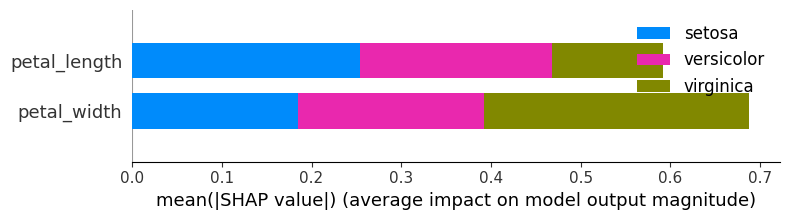

In [7]:
t4pPC.centerTitle("Train")
shap.summary_plot(shap_values_train,x_train, feature_names=features,class_names=class_names,sort=False,plot_type="bar")

<div class="rqE">

It is not suprising that in this case, the two features are used equally to classify iris flowers to the three classes. It will be interesting to do the same analysis with the four features used to classify irises. 

</div>

<div class="intro">

You can also see the summary plot of a specific class.

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance, *i.e.* a sample.

Let's visualize it on `class[0]`, *i.e.* the setosa class
</div>

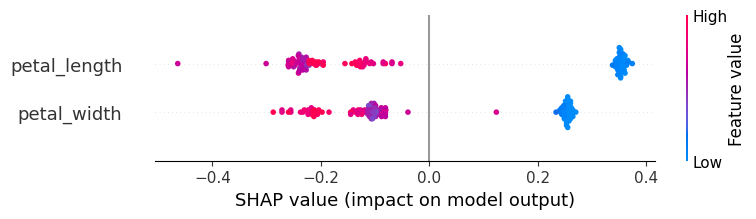

In [8]:
shap.summary_plot(shap_values_train[0],x_train)

<div class="rqE">

Both features are important to classify irises as setosas. `petal_length` either causes a large negative or positive change in the prediction. From the right scale, it is seen that red and blue represent large and small feature values, respectively. The summary plot tells us that small `petal_length` values increase the prediction, wheras large values decrease the prediction. 
</div>

<div class="intro">

We will now plot summary plots as violin plots, for all classes,  with outliers drawn as points.
</div>

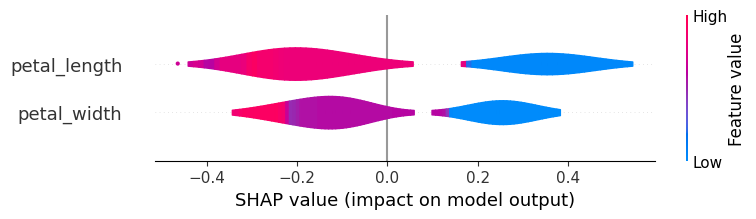

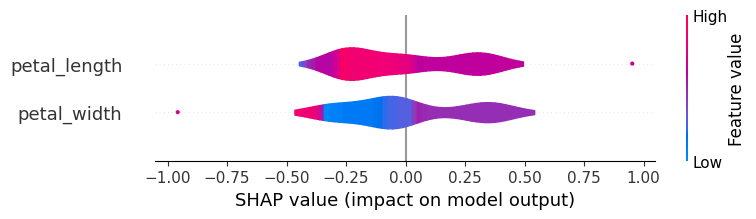

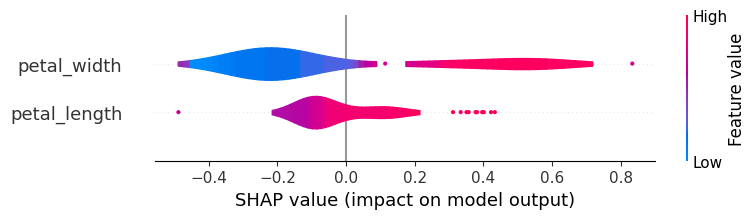

In [9]:
t4pPC.centerTitle(f"Train. Successive summary plots for {class_names}")
# setosa
shap.summary_plot(shap_values_train[0],x_train, plot_type="violin")
# versicolor
shap.summary_plot(shap_values_train[1],x_train, plot_type="violin")
# virginica
shap.summary_plot(shap_values_train[2],x_train, plot_type="violin")

<div class="rqE">

We see the first indications of the relationship between the value of a feature and the impact on the prediction. But to see the exact form of the relationship, we have to look at SHAP dependence plots
</div>

### Dependence plots

<div class="intro">

A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic, or more complex

- the x-axis is the actual value from the dataset
- the y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction
- the color corresponds to a second feature that may have an interaction effect with the feature we are plotting
- each dot is a single prediction

</div>

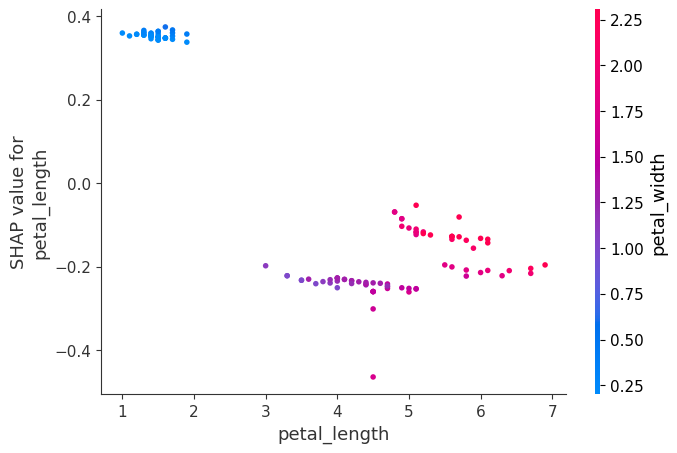

In [10]:
shap.dependence_plot(0, shap_values_train[0], x_train_unscaled)

<div class='rqE'>

So what?

</div>

### Explain predictions

<div class="intro">

First use the ANN model to predict the class affiliation for all samples of the training and test sets.
</div>

In [11]:
y_train_hat=IrisANNmodel.predict(x_train.values) #returns a numpy array
#print(y_train_hat)
y_test_hat=IrisANNmodel.predict(x_test.values)
sample = 0
t4pPC.centerTitle(f"Sample {sample}")
print(f"  Prediction = {y_train_hat[sample]}")
print(f"Actual value = {y_train.to_numpy()[sample]}")

1/1 [==============================] - 0s 19ms/step


  Prediction = [0.94923973 0.0312742  0.01948611]
Actual value = [1. 0. 0.]


#### Explain a single prediction with SHAP force plots

<div class="intro">

Force plot gives us the explainability of a single model prediction. In this plot, we can see how features contributed to the model’s prediction for a specific observation. It is very convenient to use for error analysis or a deep understanding of a particular case

We also see which features have a <span style='color:red'>positive</span> or <span style='color:blue'>negative</span> impact on "base value" prediction and the magnitude of the impact
</div>

In [25]:
def multi_force_plot(sample_index):
    shap.initjs()
    print(f"{bg.LIGHTREDB}Sample {sample_index} is actually a {class_names[np.argmax(y_train.to_numpy()[sample_index])]}{fg.OFF}")
    print()
    for iclass, nclass in enumerate(class_names):
        t4pPC.centerTitle(f"{nclass} prediction for sample {sample_index}")
        display(shap.force_plot(deep_explainer.expected_value[iclass].numpy(), shap_values_train[iclass][sample_index], features = features))

multi_force_plot(sample)

Sample 0 is actually a setosa



<div class="rqE">

- the ANN model predicts a 0.95 probability value that the flower is a setosa (see also the application of `IrisANNmodel.predict(x_test.values)`)
- the base value is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (`explainer.expected_value` in the code). In this example, the base value = 0.3405 for setosas.
- the numbers on the plot arrows are the value of the feature for this instance (or sample)
- <span style='color:red'>red</span> represents features that increase the probability the model score higher, and <span style='color:blue'>blue</span> represents features that lower the probability
- the wider the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis.
- both features, i.e. the petal lengths and withs, contribute to increase the probability that sample 0 is a setosa species
</div>

<div class="ex" title="Analyze another prediction">

Do the same for the fourth sample.

Comments ? You can answer in light of the hue scatter plot shown hereafter
</div>

In [26]:
# insert your code here



<div class="sol">

Want to see a possible answer? Uncomment the `# %load ./SolutionsToExercises/...` command below, and then run the cell
</div>

In [27]:
# %load ./SolutionsToExercises/DS4B/Iris4a.py
multi_force_plot(3)


Sample 3 is actually a virginica



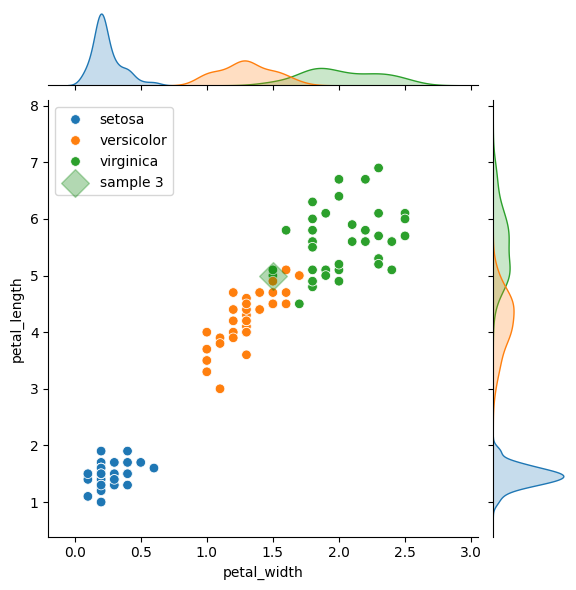

In [70]:
selected_sample = 3
pl_sample = data_train.iloc[selected_sample]["petal_length"]
pw_sample = data_train.iloc[selected_sample]["petal_width"]

import seaborn as sns
g = sns.jointplot(x = "petal_width", y = "petal_length", data = data_train, hue="species", hue_order= class_names, s=48)
g.ax_joint.scatter(pw_sample, pl_sample, color = 'green', s=200, marker="D", alpha = 0.3, label=f"sample {selected_sample}")
plt.legend()
plt.show()

<div class="rqT" title="Quite interesting this prediction analyzis!">

Do you agree?
</div>

#### Explain a single prediction with SHAP waterfall plots

<div class="intro">

The waterfall plot is another local analysis plot of a single instance prediction. It does not differ much from the previous analysis. 
</div>

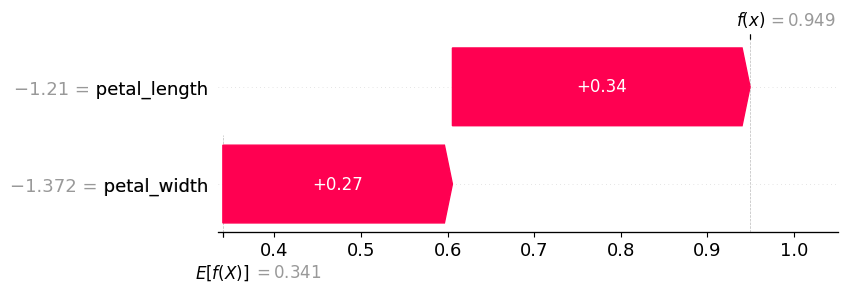

In [50]:
iclass = 0
sample_index = 0

shap.waterfall_plot(shap.Explanation(values=shap_values_train[iclass][sample_index], 
                                     base_values=deep_explainer.expected_value[iclass].numpy(), data=x_train.values[sample_index],  
                                     feature_names=features))

Sample 0 is actually a setosa



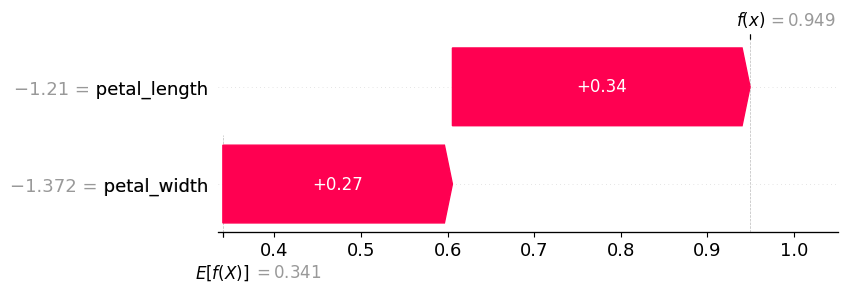

None

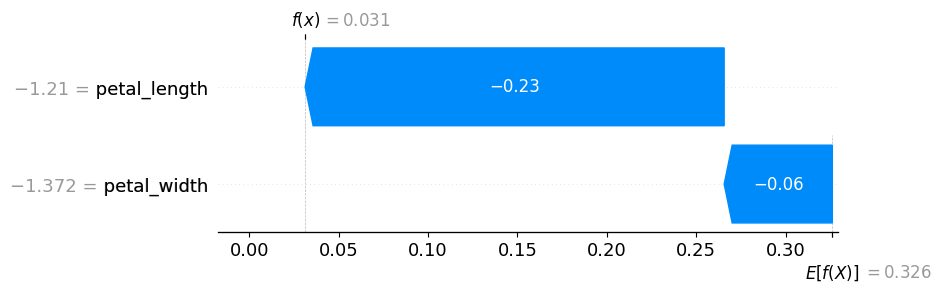

None

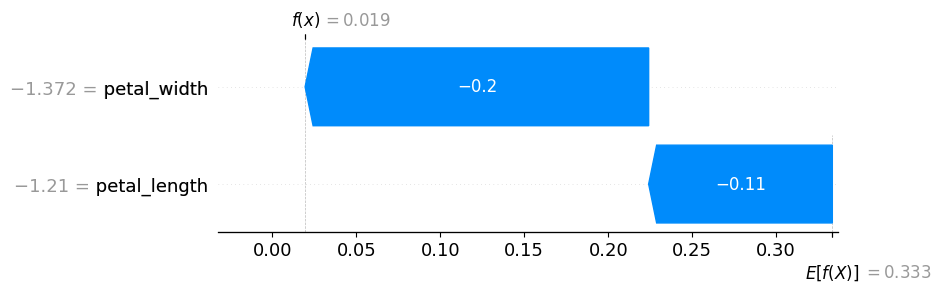

None

In [70]:
def multi_waterfall_plot(sample_index):
    shap.initjs()
    print(f"{bg.LIGHTREDB}Sample {sample_index} is actually a {class_names[np.argmax(y_train.to_numpy()[sample_index])]}{fg.OFF}")
    print()
    for iclass, nclass in enumerate(class_names):
        t4pPC.centerTitle(f"{nclass} prediction for sample {sample_index}")
        display(shap.waterfall_plot(shap.Explanation(values=shap_values_train[iclass][sample_index], 
                                     base_values=deep_explainer.expected_value[iclass].numpy(), data=x_train.values[sample_index],  
                                     feature_names=features)))

multi_waterfall_plot(sample)

#### Explain many predictions

<div class="intro">

Here we repeat the above explanation process for 50 individuals. Since we are using a sampling based approximation each explanation can take a couple seconds depending on your machine setup
</div>

In [74]:
def many_predictions_plot(nsamples):
    shap.initjs()
    selected_samples = np.random.choice(x_train.values.shape[0], size=50, replace=False, p=None)
    for iclass, nclass in enumerate(class_names):
        t4pPC.centerTitle(f"{nclass}")
        display(shap.force_plot(deep_explainer.expected_value[iclass].numpy(), shap_values_train[iclass][selected_samples], features = features))

many_predictions_plot(50)

<div class="rq">

In all cases, the petal length and width play an important role. 
</div>

## Conclusion

<div class="rq">

The SHAP framework has proved to be an important advancement in the field of machine learning model interpretation. 

SHAP combines several existing methods to create an intuitive, theoretically sound approach to explain predictions for any model.

SHAP values quantify the magnitude and direction (positive or negative) of a feature’s effect on a prediction

XAI analysis with SHAP and other tools, such as a preliminary analysis of the data should be an integral part of the machine learning framework
</div>

## Bibliography

- [Explainable AI (XAI) on Wikipedia](https://en.wikipedia.org/wiki/Explainable_artificial_intelligence)
- [SHAP documentation](https://shap.readthedocs.io/en/latest/)
- [XAI with SHAP -Multi-Class Classification Problem](https://towardsdatascience.com/explainable-ai-xai-with-shap-multi-class-classification-problem-64dd30f97cea)


In [ ]:
vID.end(cwd0)